In [1]:
# imports

import sys
import os

import pandas as pd

sys.path.append('D:/grb/grbLC/')
import grblc

from grblc.evolution.lightcurve import Lightcurve

In [2]:
# run this the first time you use grblc to download SFD maps

# import grblc.convert.sfd
# grblc.convert.sfd.fetch()

In [3]:
grb = '090926A'

lc = Lightcurve(path = 'D:/grb/sample/mag-AB-extcorr-30-05-2023/'+grb+'_magAB_extcorr.txt',
                data_space= 'lin',
                name = grb)
#lc.displayGRB()

In [4]:
lc.set_data(set_bands=True)

090926A
-------
   band_occur
I          48
R          47
V          19
B          17
J           3
i           1
r           1
g           1 
The reference filter for rescaling of this GRB:  I , with 48 occurrences.

Individual point rescaling:
     time_sec  resc_fact  resc_fact_err band_set  band_occur
18   4.837754  -0.703677       0.290689        V          19
19   4.837918  -0.664493       0.248395        R          47
22   4.853441  -0.364493       0.086023        R          47
23   4.855156  -0.533677       0.107703        V          19
24   4.856324  -0.843677       0.107703        V          19
..        ...        ...            ...      ...         ...
149  5.634579  -1.381694       0.197231        B          17
151  5.644288  -0.744493       0.170294        R          47
152  5.706467  -0.214493       0.186011        R          47
155  5.720503  -0.424493       0.186011        R          47
157  5.721844   0.105507       0.599083        R          47

[84 rows x 5 columns]

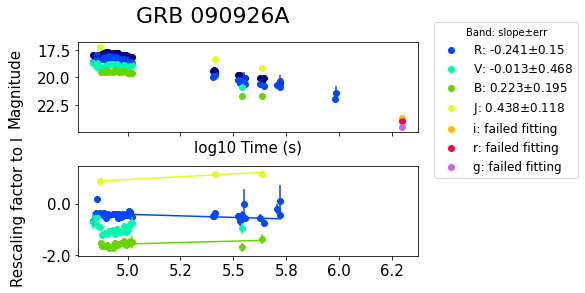

In [5]:
fig, *__ = lc.colorevolGRB(save=True)
fig.show()

In [6]:
figunresc, figresc, *___ = lc.rescaleGRB(save=True)
figunresc.show()
figresc.show()

# convert to AB system and correct for extinction

import grblc.convert as cv

info = pd.read_csv('data/grblist.csv', sep=',', index_col='grb')

grb = '970228A'

cv.correctGRB(grb = grb,
            ra = info.loc[grb, 'ra'],
            dec = info.loc[grb, 'dec'],
            path = 'converted/970228A_magAB_extcorr.txt',
            save_in_folder = 'converted/',
            debug = False
            )